# <b>CS156 (Introduction to AI), Spring 2021</b>
### Manual Implementation of KNN (K Nearest Neighbors) classifier 

##  <u>Solution</u>

In [1]:
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
np.random.seed(42)

2-D data: Generating 100 synthetic samples from distributions of 2 classes

In [2]:
n = 100 

X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y1 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))
X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

In [3]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
dt = pd.DataFrame({'X':X, 'Y':Y, 'L':labels}, columns=['X','Y','L'])
dt.head()


,X,Y,L
0,-1.006572,-1.415371,0
1,-2.276529,-0.420645,0
2,-0.704623,-0.342715,0
3,1.046060,-0.802277,0
4,-2.468307,-0.161286,0


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels, test_size=0.2, random_state=0)

In [6]:
def knn (newObservation, referenceData, k=3) :
    distances = []
    for i in range(len(referenceData)):
        distance = np.linalg.norm(np.array(referenceData.iloc[i]) - np.array(newObservation))
        distances.append([distance, referenceData.iloc[i]])
    distances.sort(key = lambda x: x[0])
    top = distances[0:k]
    votes = []
    for j in range(len(top)):
        votes.append(top[j][1]['L'])
    return collections.Counter(votes).most_common(1) [0][0]

In [7]:
results = []
accuracy = 0
for k in range(len(X_test)):
    model = knn(X_test.iloc[k], X_train)
    results.append(int(model))
for l in range(len(results)):
    if (results[l] == Y_test[l]):
        accuracy += 1
accuracy /= len(results)
print(accuracy)

0.95


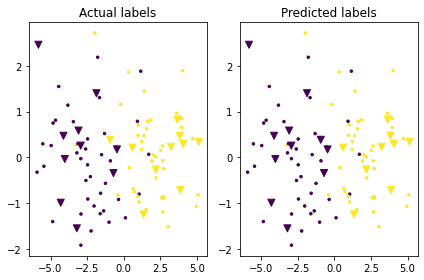

In [8]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

3-D data: Generating 1000 synthetic samples from distributions of 4 classes

In [9]:
n = 1000  

X0 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y0 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))
Z0 = np.random.normal(loc=-1.0, scale=1.0, size=int(n/4))

X1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y1 = np.random.normal(loc=1.0, scale=2.0, size=int(n/4))
Z1 = np.random.normal(loc=1.0, scale=1.0, size=int(n/4))

X2 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y2 = np.random.normal(loc=3.0, scale=1.0, size=int(n/4))
Z2 = np.random.normal(loc=4.0, scale=1.0, size=int(n/4))

X3 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y3 = np.random.normal(loc=5.0, scale=3.0, size=int(n/4))
Z3 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))

X = np.concatenate((X0, X1, X2, X3), axis=0)
Y = np.concatenate((Y0, Y1, Y2, Y3), axis=0)
Z = np.concatenate((Z0, Z1, Z2, Z3), axis=0)

In [10]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2


In [11]:
dt = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z, 'L':labels}, columns=['X','Y','Z','L'])
dt.head()

,X,Y,Z,L
0,1.073362,-3.062679,-1.522723,0
1,1.682354,-2.044858,0.049009,0
2,3.249154,-3.985726,-1.704344,0
3,3.161406,-2.495953,-2.408461,0
4,-4.133008,-3.530258,-2.556629,0


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels, test_size=0.2, random_state=0)

In [13]:
results = []
accuracy = 0
for k in range(len(X_test)):
    model = knn(X_test.iloc[k], X_train)
    results.append(int(model))
for l in range(len(results)):
    if (results[l] == Y_test[l]):
        accuracy += 1
accuracy /= len(results)
print(accuracy)

0.99
